# Qiskit 1 - Hadamard measurement

1. Theoretical overview
2. Define a quantum circuit
3. Obtain a circuit diagram
4. Execute circuit on local resource
5. Obtain results and visualize
6. Execute circuit in the cloud
7. Obtain results and visualize

## 1 - Theoretical overview

The quantum state **S** is represented by either a 0 or 1 complex vector:

$$S_0 = \begin{pmatrix}1\\0\end{pmatrix}, S_1 = \begin{pmatrix}0\\1\end{pmatrix}$$


The system dynamics comes from the Hadamard operator **H** represented by the unitary matrix:

$$H = \frac{1}{\sqrt2}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix}$$

We aim to operate on the state vector **S** with the Hadamard matrix **H**, this will generate a new state vector **T** which will be in a superposition of the the state vector **S** basis vectors as per the following proportions:

$$ T_0 = H S_0 = \frac{1}{\sqrt2}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}\frac{2}{\sqrt2}\\\frac{2}{\sqrt2}\end{pmatrix}$$

$$ T_1 = H S_1 = \frac{1}{\sqrt2}\begin{pmatrix} 1 & 1\\1 & -1\end{pmatrix} \begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}\frac{2}{\sqrt2}\\-\frac{2}{\sqrt2}\end{pmatrix}$$


When we then introduce the system to measurement, the superposition will collapse to a single position in accordance with the state vectors wavefunction probability amplitudes. Concretely in our case we will find the system in a state of 0 half of the times and in a state of 1 half of the times:

$$P(0) = T_0^2 = \begin{pmatrix}\frac{2}{\sqrt2}^2\\\frac{2}{\sqrt2}^2\end{pmatrix} = \begin{pmatrix}\frac{1}{2}\\\frac{1}{2}\end{pmatrix} = \begin{pmatrix}\frac{2}{\sqrt2}^2\\-\frac{2}{\sqrt2}^2\end{pmatrix} = T_1^2 = P(1)$$

## 2 - Define a quantum circuit

In [38]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Our statevector represented by the quantumregister S
S = QuantumRegister(2)

# A classical register for the result which consist of one bit 0 or 1
res = ClassicalRegister(2)

# A QuantumCircuit object takes in the registers to operate on, now we must define 
# which operations and in which order. We add them to the QuantumCircuit object as methods.
cir = QuantumCircuit(S, res)

# Add a hadamard operator to the QuantumCircuit
cir.h(S)

# Add a measurement
cir.measure(S, res)

## 3 - Obtain a circuit diagram

In [15]:
print(cir.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q1[2];
creg c1[2];
h q1[0];
h q1[1];
measure q1[0] -> c1[0];
measure q1[1] -> c1[1];



In [39]:
print(cir)

         ┌───┐┌─┐   
q3_0: |0>┤ H ├┤M├───
         ├───┤└╥┘┌─┐
q3_1: |0>┤ H ├─╫─┤M├
         └───┘ ║ └╥┘
 c3_0: 0 ══════╩══╬═
                  ║ 
 c3_1: 0 ═════════╩═
                    


In [40]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(cir)

## 4 - Execute circuit on local resource

In [41]:
from qiskit import Aer, execute
# Define the simulator on which the job will run on
sim = Aer.get_backend('qasm_simulator')

# Define a job as the execution of the Quantum circuit on the simulator chosen
job = execute(cir, sim)

## 5 - Obtain results and visualize

In [42]:
# Instantiate the result class on the job
result = job.result()

# Get statistics from the execution of the curcuit. These are the outcome measurements
# from 1 000 trials.
count = result.get_counts(cir)
print(count)

{'11': 270, '00': 242, '01': 257, '10': 255}


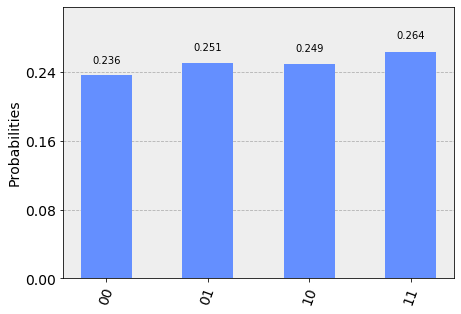

In [43]:
from qiskit.tools.visualization import plot_histogram, iplot_histogram

plot_histogram(count)